In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# the approach here is to numerically simulate as a function of light intensity and time
# the fraction of a population of ion channels that are open, based on first order kinetics, 
# and to use that as the input to a conductance based neuron model with some fixed leak conductance. 
# The result will be a simulated depolarization PSF, in mV, as a function of offset from the
# target center in z.
dt = 0.01 # granularity of the simulation in ms; this should be small
tmax = 20 # number of ms to simulate
t = np.linspace(0,tmax,tmax/dt+1)
Nt = t.size
dintensity = 0.001 # granularity of light intensities to simulate; this should be small
intensitymax = 3 # maximum intensity to test, in units of 1/sqrt(opsin two photon action cross section* opsin tau off)
intensity = np.linspace(0,intensitymax,intensitymax/dintensity+1)
Ni = intensity.size
koff = 0.1 # 1/(opsin tau off in ms)
gmax = 1 # conductance with all channels open, in units of membrane capacitance/ms
gL = 0.1 # leak conductance of the cell, in units of membrane capacitance/ms
Vrest = -70 # resting membrane potential in mV
Ec = 0 # opsin reversal potential in mV

Copen = np.zeros((Nt,Ni)) # vector of the fraction open channels over time and intensity
V = Vrest*np.ones((Nt,Ni)) # vector of cell membrane voltage over time and intensity, in mV

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


In [15]:
for i,time in enumerate(t[:-1]):
    # first order kinetics a two-state model and two photon absorption
    Copen[i+1] = Copen[i] + dt*intensity**2*(1-Copen[i]) - dt*koff*Copen[i] 

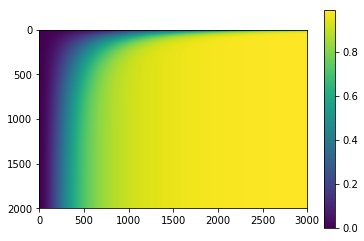

In [16]:
plt.figure()
plt.imshow(Copen)
plt.colorbar()

In [17]:
for i,time in enumerate(t[:-1]):
    # conductance based membrane voltage model, defined relative to 
    V[i+1] = V[i] + dt*gmax*Copen[i]*(Ec-V[i]) + dt*gL*(Vrest-V[i])

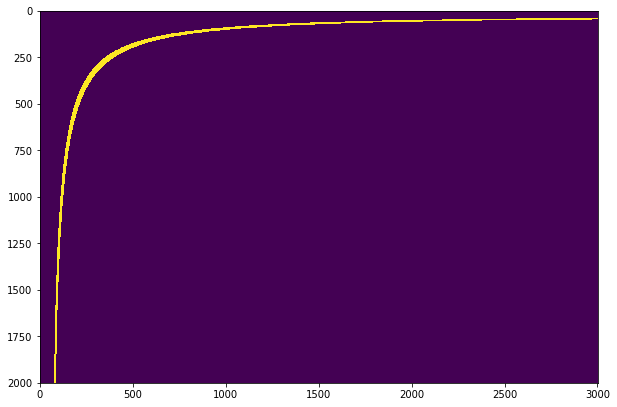

In [20]:
plt.figure(figsize=(10,7))
thresh = -50 # look for time until cell depolarizes to this voltage, in mV
plt.imshow(np.abs(V-thresh)<2)


In [22]:
def lorentzian(z,zR=1):
    return 1/(1+(z/zR)**2)

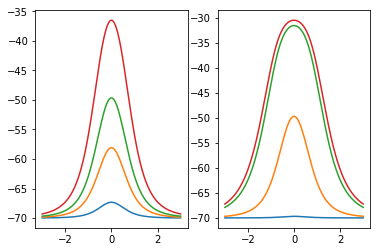

In [25]:
# assuming a Lorentzian point spread function, plot depolarization vs. z (in units of FWHM/2)
# for various choice of dwell time and light intensity

plt.figure()
plt.subplot(1,2,1)
# t = 100
z = np.linspace(-3,3,1000)
for t in (30,70,100,150):
    vals = np.interp(lorentzian(z),intensity,V[t,:])
    plt.plot(z,vals)

plt.subplot(1,2,2)
t = 100
z = np.linspace(-3,3,1000)
for i in (0.1,1,2.6,3):
    vals = np.interp(i*lorentzian(z),intensity,V[t,:])
    plt.plot(z,vals)

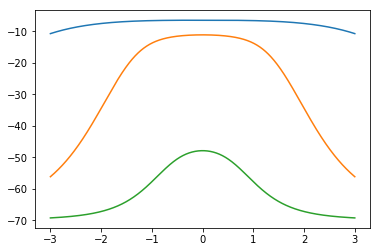

In [26]:


Vtgt = 20

stoptime = -1
peakintensity = np.argmin(np.abs(V[stoptime]-Vtgt))
vals = np.interp(1.2*intensity[peakintensity]*lorentzian(z),intensity,V[stoptime,:])
plt.plot(z,vals)

stoptime = 250
peakintensity = np.argmin(np.abs(V[stoptime]-Vtgt))
vals = np.interp(intensity[peakintensity]*lorentzian(z),intensity,V[stoptime,:])
plt.plot(z,vals)

stoptime = 50
peakintensity = np.argmin(np.abs(V[stoptime]-Vtgt))
vals = np.interp(intensity[peakintensity]*lorentzian(z),intensity,V[stoptime,:])
plt.plot(z,vals)

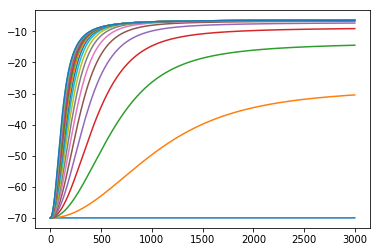

In [27]:
plt.figure()
# at various times, plot the intensity vs. depolarization curve
plt.plot(V[::100,:].T)

need to figure out the combination of intensity and waiting time that maximizes the squareness of the intensity dependence while still ensuring a spike at the desired location. Is it slow and low intensity, or fast and high intensity?

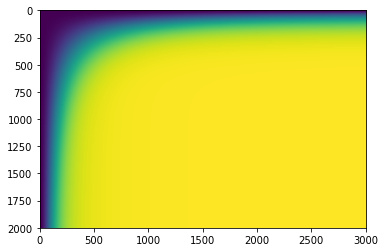

In [28]:
plt.figure()
plt.imshow(V)